# Classification error using SVM and KNN

***Importing modules and loding dataset of Iris.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loding dataset
df = pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Stats about data

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


To display number of samples of each class

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Preprocessing dataset

In [7]:
#check null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploring data analysis - Histogram

Text(0.5, 1.0, 'histogram of sepalLength')

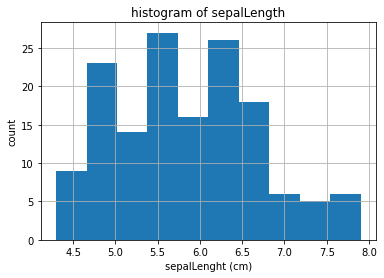

In [8]:
#Histogram
df['SepalLengthCm'].hist()
plt.xlabel('sepalLenght (cm)')
plt.ylabel('count')
plt.title('histogram of sepalLength')

Text(0.5, 1.0, 'histogram of sepalWidth')

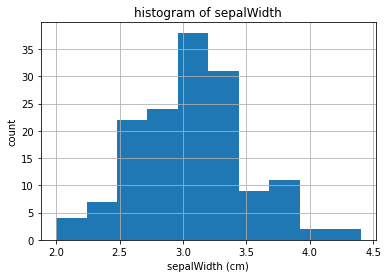

In [9]:
df['SepalWidthCm'].hist()
plt.xlabel('sepalWidth (cm)')
plt.ylabel('count')
plt.title('histogram of sepalWidth')

Text(0.5, 1.0, 'histogram of petalLength')

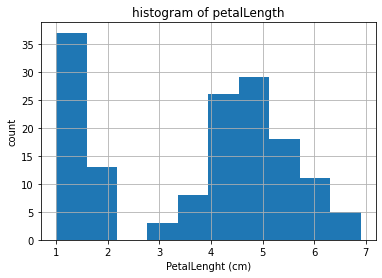

In [10]:
df['PetalLengthCm'].hist()
plt.xlabel('PetalLenght (cm)')
plt.ylabel('count')
plt.title('histogram of petalLength')

In [4]:
df['PetalWidthCm'].hist()
plt.xlabel('PetalWidth (cm)')
plt.ylabel('count')
plt.title('histogram of PetalWidth')

NameError: name 'df' is not defined

# Scatter Plot

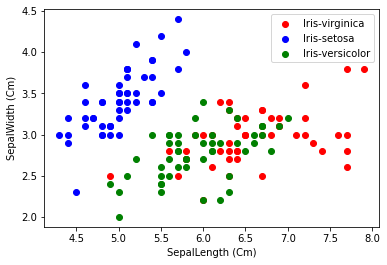

In [12]:
color = ['red','blue','green']
species = ['Iris-virginica','Iris-setosa','Iris-versicolor']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c= color[i], label = species[i])
plt.xlabel('SepalLength (Cm)')
plt.ylabel('SepalWidth (Cm)')
plt.legend()

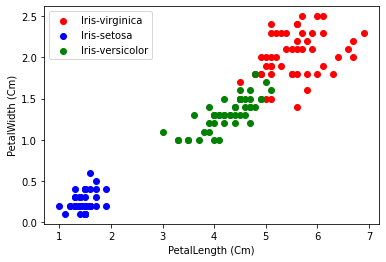

In [13]:
color = ['red','blue','green']
species = ['Iris-virginica','Iris-setosa','Iris-versicolor']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c= color[i], label = species[i])
plt.xlabel('PetalLength (Cm)')
plt.ylabel('PetalWidth (Cm)')
plt.legend()

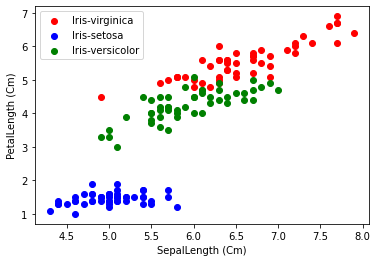

In [14]:
color = ['red','blue','green']
species = ['Iris-virginica','Iris-setosa','Iris-versicolor']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c= color[i], label = species[i])
plt.xlabel('SepalLength (Cm)')
plt.ylabel('PetalLength (Cm)')
plt.legend()

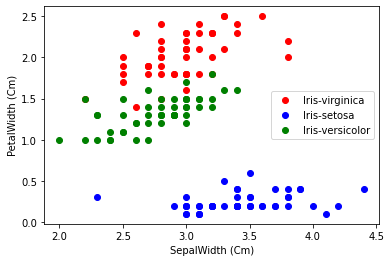

In [15]:
color = ['red','blue','green']
species = ['Iris-virginica','Iris-setosa','Iris-versicolor']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c= color[i], label = species[i])
plt.xlabel('SepalWidth (Cm)')
plt.ylabel('PetalWidth (Cm)')
plt.legend()

# correlation Matrix

In [16]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


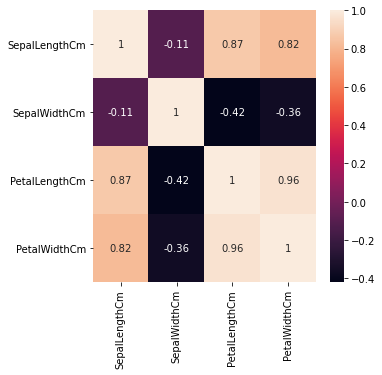

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot = True , ax = ax)

# Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Model Tranning

In [31]:
#seprating test and train dataset
from sklearn.model_selection import train_test_split

#train - 70%
#test - 30%

X = df.drop(columns = ['Species'])
#We need input variable in X, hence dropped Species

Y = df['Species'] #output variable

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_predict1=model.predict(x_test)

In [35]:
#Acuracy
print("Acuracy - ",model.score(x_test,y_test)*100)

Acuracy -  97.77777777777777


In [36]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values,y_predict1)
cm

array([[18,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 13]], dtype=int64)

In [37]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,18,0,0
versicolor,0,13,1
virginica,0,0,13


In [38]:
#output Visualization
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])

In [39]:
prediction_output.transpose()

,y_test,y_predict1
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,2,2
6,2,2
7,0,0
8,2,2
9,2,2


In [40]:
prediction_output.iloc[0,:].value_counts()

0    18
1    14
2    13
Name: y_test, dtype: int64

<h4>Form the above analysis we can see that versicor is predicted as virginica.Hence accuracy is 97%<h4>

<h3> Finding Value of K <h3>

In [85]:
from sklearn.metrics import accuracy_score
Ks=50
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    model=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    predict1=model.predict(x_test)
    mean_acc[n-1]=accuracy_score(y_test,predict1)
print(mean_acc)

[0.97777778 0.93333333 0.97777778 0.97777778 0.97777778 1.
 0.97777778 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.97777778 0.97777778
 0.97777778 0.91111111 0.93333333 0.93333333 0.93333333 0.91111111
 0.91111111 0.88888889 0.88888889 0.88888889 0.88888889 0.86666667
 0.88888889 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.88888889 0.86666667 0.88888889 0.86666667 0.88888889
 0.82222222]


In [86]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 6


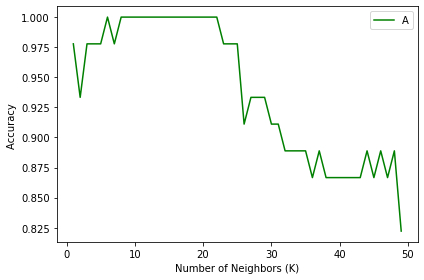

In [83]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# SVM

In [50]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1)

In [51]:
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [72]:
y_predict1=model.predict(x_test)

In [73]:
#Acuracy
print("Acuracy - ",model.score(x_test,y_test)*100)

Acuracy -  97.77777777777777


In [74]:
#output Visualization
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])

In [67]:
prediction_output.transpose()

,y_train,y_predict1
0,1,1
1,0,0
2,1,1
3,2,2
4,2,2
...,...,...
100,1,1
101,0,0
102,1,1
103,2,2


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [76]:
#confusion Matrix
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,18,0,0
versicolor,0,13,1
virginica,0,0,13


<h4>By using SVM, We can see that precision of virginica is less. 
    We can see from our analysis that one flower of versicolor is predicted as virginica.<h4>  